In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [2]:
from Code import preproc_scores, preproc_ratings, preproc_behavior, plot_scores, plot_ratings, plot_behavior

## Set Paths and Parameters

In [3]:
# ToDo: Adapt wave and problematic subject list
wave = 2
if wave == 1:
    problematic_subjects = [1, 3, 12, 19, 33, 45, 46]
elif wave == 2:
    problematic_subjects = [1, 2, 3, 4, 20, 29, 64]

In [4]:
dir_path = os.getcwd()
dir_path = os.path.abspath(os.path.join(dir_path, os.pardir))
# ToDo: Adapt folder name
file_path = os.path.join(dir_path, f'Data-Wave{wave}')

## Calculate Questionnaire Scores

In [5]:
file_name = [item for item in os.listdir(file_path) if (item.endswith(".xlsx") and "raw" in item)][0]
df_scores_raw = pd.read_excel(os.path.join(file_path, file_name))
df_scores_raw = df_scores_raw.loc[df_scores_raw["FINISHED"] == 1]
df_scores, problematic_subjects = preproc_scores.create_scores(df_scores_raw, problematic_subjects)
df_scores.to_csv(os.path.join(file_path, 'scores_summary.csv'), index=False, decimal='.', sep=';', encoding='utf-8-sig')

## Calculate Rating Scores

In [6]:
start = 1
vp_folder = [int(item.split("_")[1]) for item in os.listdir(file_path) if ("VP" in item)]
end = np.max(vp_folder)
vps = np.arange(start, end + 1)
vps = [vp for vp in vps if not vp in problematic_subjects]

In [7]:
df_ratings_total, problematic_subjects = preproc_ratings.create_ratings(vps, file_path, problematic_subjects, df_scores)
df_ratings = df_ratings_total.loc[~(df_ratings_total["VP"].isin(problematic_subjects))]
df_ratings.to_csv(os.path.join(file_path, 'ratings.csv'), index=False, decimal='.', sep=';')

VP 09: Rating Friendly: 30; Rating Unfriendly: 83
VP 16: Rating Friendly: 0; Rating Unfriendly: 79
VP 28: Rating Friendly: 1; Rating Unfriendly: 36
VP 33: Rating Friendly: 36; Rating Unfriendly: 32
VP 40: Rating Friendly: 8; Rating Unfriendly: 57
VP 55: Rating Friendly: 7; Rating Unfriendly: 8
VP 62: Rating Friendly: 10; Rating Unfriendly: 1
VP 65: Rating Friendly: 19; Rating Unfriendly: 50
VP 70: Rating Friendly: 5; Rating Unfriendly: 89


## Sample Description

In [8]:
df_scores_total = df_scores.copy()
df_scores = df_scores.loc[~(df_scores["ID"].isin(problematic_subjects))]
print(f"N = {len(df_scores)}")
print(f"Mean Age = {round(df_scores['age'].mean(), 2)}, SD = {round(df_scores['age'].std(), 2)}, Range = {df_scores['age'].min()}-{df_scores['age'].max()}")
print(df_scores['gender'].value_counts(normalize=True))
print(problematic_subjects)

N = 48
Mean Age = 23.48, SD = 3.96, Range = 19.0-37.0
female    1.0
Name: gender, dtype: float64
[1, 2, 3, 4, 20, 29, 36, 38, 39, 48, 59, 61, 64, 9, 16, 28, 33, 40, 55, 62, 65, 70]


## Scores

In [9]:
save_path = os.path.join(file_path, 'Scores')
if not os.path.exists(save_path):
    os.makedirs(save_path)

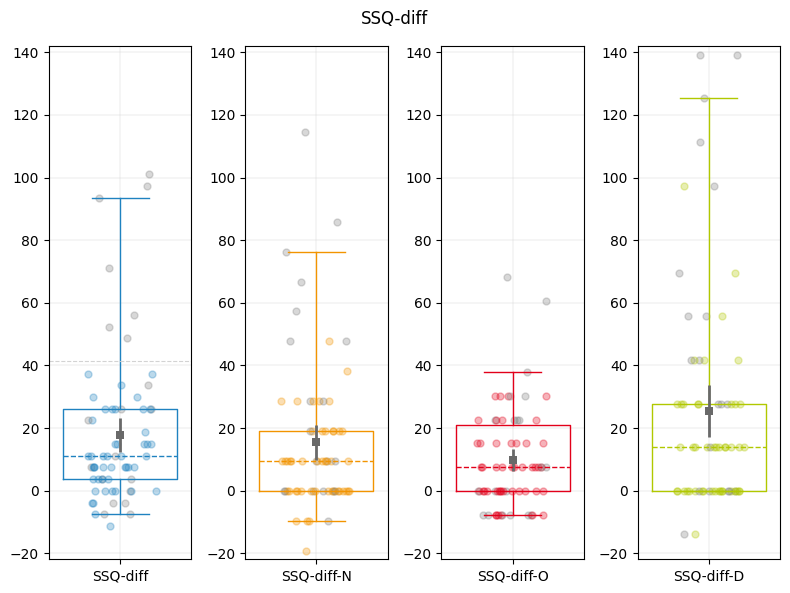

In [10]:
scales = ["SSQ-post", "SSQ-diff", "IPQ", "MPS", "ASI", "SPAI", "SIAS", "AQ", "ISK"]
colors = ['#1F82C0', '#F29400', '#E2001A', '#B1C800', '#179C7D']

for scale in scales:
    plot_scores.plot_scale(df_scores_total, scale, colors, problematic_subjects)
    plt.savefig(os.path.join(save_path, f"{scale}.png"), dpi=300)
    if not scale == "SSQ-diff":
        plt.close()

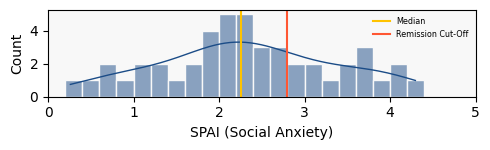

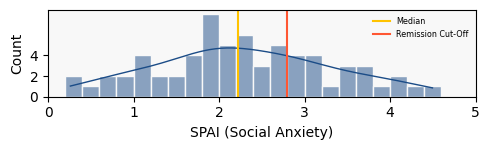

In [11]:
plot_scores.plot_sad(df_scores)
plt.savefig(os.path.join(save_path, f"spai_distribution.png"), dpi=300)
plot_scores.plot_sad(df_scores_total)
plt.savefig(os.path.join(save_path, f"spai_distribution_total.png"), dpi=300)

## Ratings

In [12]:
save_path = os.path.join(file_path, 'Ratings')
if not os.path.exists(save_path):
    os.makedirs(save_path)

Correlation between Wellbeing after Test-Phase and SSQ-diff r = -0.43, p = 0.003


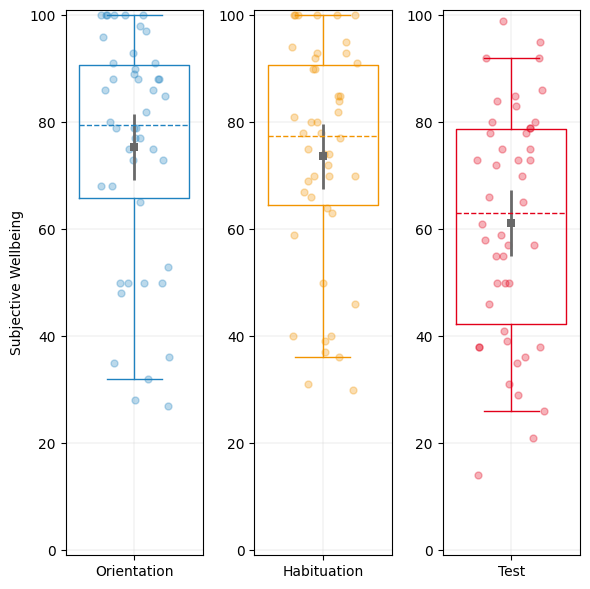

In [13]:
plot_ratings.plot_rating_vr(df_ratings)
plt.savefig(os.path.join(save_path, f"ratings_vr.png"), dpi=300)

P-values adjusted by holm method for 1 comparisons
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
P-values adjusted by holm method for 1 comparisons
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)


C:\Users\sag22id\Anaconda3\envs\mobile_gaze_physio\lib\site-packages\rpy2\robjects\pandas2ri.py:65: UserWarning: Error while trying to convert the column "Condition". Fall back to string conversion. The error is: <class 'float'>
  warnings.warn('Error while trying to convert '


P-values adjusted by holm method for 1 comparisons


C:\Users\sag22id\Anaconda3\envs\mobile_gaze_physio\lib\site-packages\rpy2\robjects\pandas2ri.py:65: UserWarning: Error while trying to convert the column "Condition". Fall back to string conversion. The error is: <class 'float'>
  warnings.warn('Error while trying to convert '


SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)


C:\Users\sag22id\Documents\Projects\VirtualVisit\virtualvisit\Code\toolbox\utils.py:232: RuntimeWarning: Mean of empty slice
  lst_means.append(np.nanmean(np.array(re_sampled), axis=0))


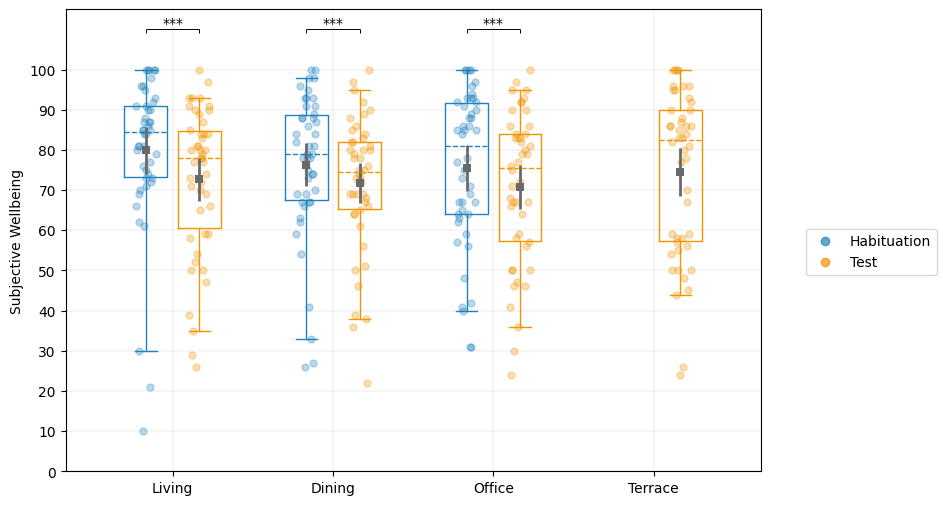

In [14]:
plot_ratings.plot_rating_rooms(df_ratings, wave)
plt.savefig(os.path.join(save_path, f"ratings_rooms.png"), dpi=300, bbox_inches="tight")


Likeability
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
P-values adjusted by holm method for 3 comparisons
Condition Main Effect, F(2, 90.0)=85.05, p=0.0, p_eta_2=0.57

Fear
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
P-values adjusted by holm method for 3 comparisons
Condition Main Effect, F(2, 90.0)=28.05, p=0.0, p_eta_2=0.35

Anger
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
P-values adjusted by holm method for 3 comparisons
Condition Main Effect, F(2, 90.0)=43.03, p=0.0, p_eta_2=0.43

Attractiveness
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
P-values adjusted by holm meth

C:\Users\sag22id\Documents\Projects\VirtualVisit\virtualvisit\Code\toolbox\utils.py:232: RuntimeWarning: Mean of empty slice
  lst_means.append(np.nanmean(np.array(re_sampled), axis=0))


SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
P-values adjusted by holm method for 3 comparisons
Condition Main Effect, F(2, 90.0)=131.08, p=0.0, p_eta_2=0.67


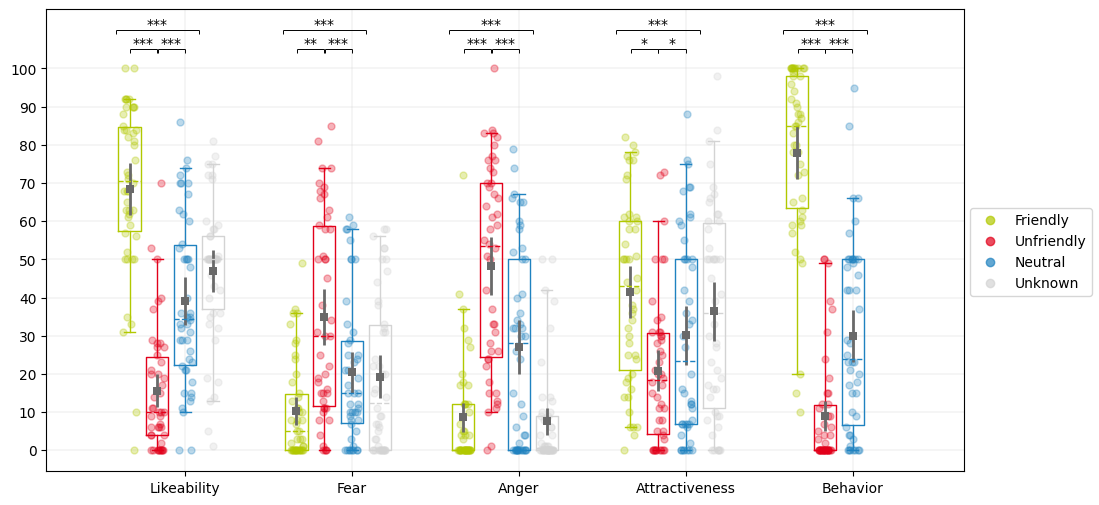

In [15]:
plot_ratings.plot_rating_agents(df_ratings)
plt.savefig(os.path.join(save_path, f"ratings_agents.png"), dpi=300, bbox_inches="tight")

In [16]:
plot_ratings.corr_ratings(df_ratings)

Likeability x Fear: r = -0.39, p = 0.0
Likeability x Anger: r = -0.62, p = 0.0
Fear x Anger: r = 0.45, p = 0.0



Likeability
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
SPAI Main Effect, F(1, 44.0)=1.57, p=0.217, p_eta_2=0.02
Condition Main Effect, F(1, 44.0)=177.5, p=0.0, p_eta_2=0.68
Interaction, F(1, 44.0)=0.02, p=0.902, p_eta_2=0.0

Fear
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
SPAI Main Effect, F(1, 44.0)=9.46, p=0.004, p_eta_2=0.12
Condition Main Effect, F(1, 44.0)=54.48, p=0.0, p_eta_2=0.45
Interaction, F(1, 44.0)=7.38, p=0.009, p_eta_2=0.1

Anger
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
SPAI Main Effect, F(1, 44.0)=0.61, p=0.439, p_eta_2=0.01
Condition Main Effect, F(1, 44.0)=101.14, p=0.0, p_eta_2=0.59
Interaction, F(1, 44.0)=0.62, p=0.434, p_eta_2=0.01


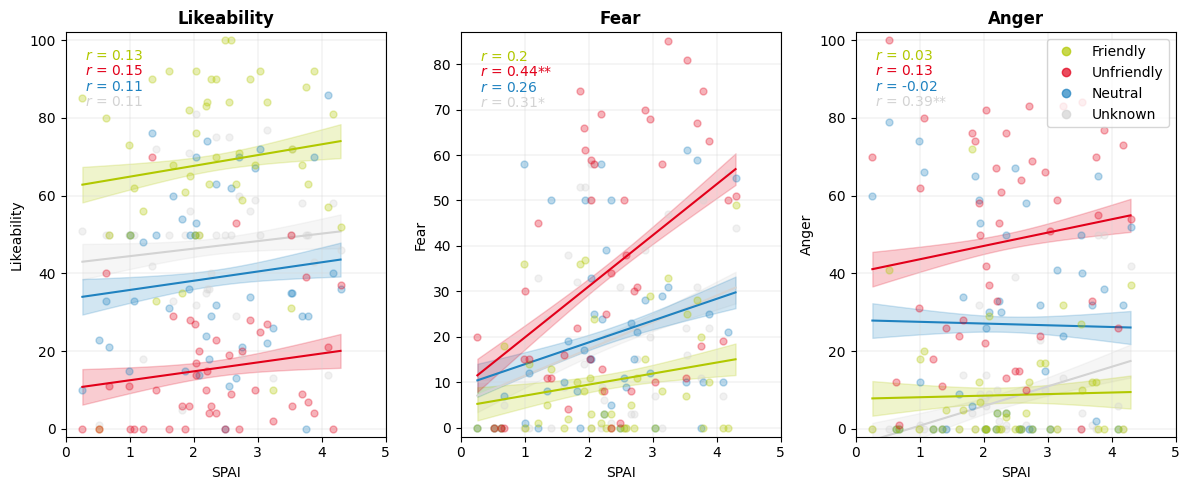

In [17]:
plot_ratings.plot_rating_agents_sad(df_ratings, SA_score="SPAI")
plt.savefig(os.path.join(save_path, f"ratings_agents_SPAI.png"), dpi=300, bbox_inches="tight")